## Lecture Notebook - Exploratory Data Analysis & Data Processing

In [135]:
# Notebook with supplemental code for lecture on data processing

import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTENC

In [136]:
# Make pandas show all columns
pd.set_option('display.max_columns', None)

### Census Income (Adult) Dataset

In [137]:
# Read the censur income dataset (adult), set the correct column names, and show first 5 rows
dataset_census_income = pd.read_csv('../data/census_income/adult.data', header=None)
column_names = [
    'age', 
    'workclass', 
    'fnlwgt', 
    'education', 
    'education-num',
    'marital-status', 
    'occupation', 
    'relationship', 
    'race', 
    'sex', 
    'capital-gain', 
    'capital-loss', 
    'hours-per-week', 
    'native-country', 
    'income']
dataset_census_income.columns = column_names
dataset_census_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [138]:
# Show the counts and type information for each column
dataset_census_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There should, based on the documentation of the dataset, be missing values, but for some reason they 
don't show up. 

In [139]:
# Count the number of missing values in each column
dataset_census_income.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Not showing up here either..

In [140]:
# Show the unique values in one of the columns that are supposed to contain missing values
dataset_census_income['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

Missing values have been encoded with ?. This won't work as intended with pandas missing value functionality

In [141]:
# Replacing ? with nans to make pandas library work as intended

dataset_census_income['workclass'] = dataset_census_income['workclass'].replace(' ?', np.NaN)
dataset_census_income['occupation'] = dataset_census_income['occupation'].replace(' ?', np.NaN)
dataset_census_income['native-country'] = dataset_census_income['native-country'].replace(' ?', np.NaN)


### Missing values

The missing values in the census income dataset are all in categorical features.

In [142]:
# Show unique values of workclass
dataset_census_income['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

There is no obvious choice for the missing values, so let us encode them as 'Unknown'

In [143]:
# Fill in the missing values in workclass with 'Unknown'
dataset_census_income['workclass'] = dataset_census_income['workclass'].fillna('Unknown')

In [144]:
# Show unique values of occupation
dataset_census_income['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

No obvious way to fill missing values. Fill with 'Unknown'

In [145]:
# Fill in the missing values in occupation with 'Unknown'
dataset_census_income['occupation'] = dataset_census_income['occupation'].fillna('Unknown')

In [146]:
# Show unique values of native-country
dataset_census_income['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [147]:
# Fill in the missing values in native-country with 'Unknown'
dataset_census_income['native-country'] = dataset_census_income['native-country'].fillna('Unknown')

### Set appropriate types

In [148]:
# Change the type of the categorical features. This ensures that the columns are properly 
# handled by internal and auxilliary functionality e.g. SMOTE
categorical_features = [
    'workclass', 
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country', 
    'income']
dataset_census_income[categorical_features] = dataset_census_income[categorical_features].astype('category')
dataset_census_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education-num   32561 non-null  int64   
 5   marital-status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital-gain    32561 non-null  int64   
 11  capital-loss    32561 non-null  int64   
 12  hours-per-week  32561 non-null  int64   
 13  native-country  32561 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


### Class imbalance

<Axes: >

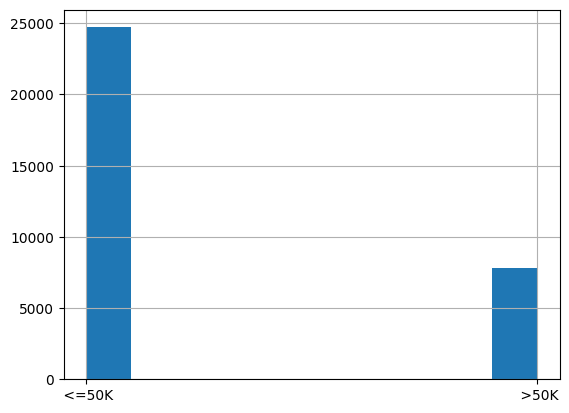

In [149]:
dataset_census_income['income'].hist()

There is a clear class imbalance. Let us create two additional datasets, one where we under-sample the over-represented class, and one where we over-sample the under-represented class.

<Axes: >

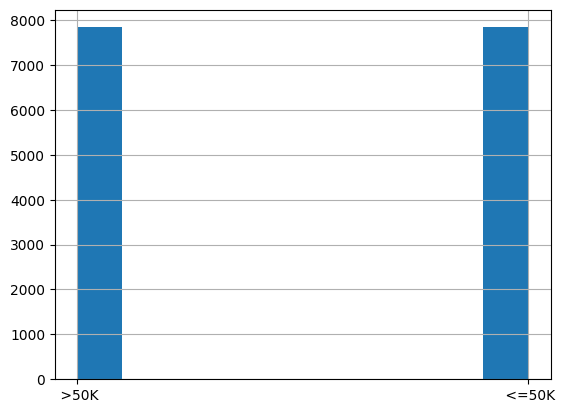

In [150]:
# Under-sampling

# Get all instances for the under-represented class

dataset_census_income_greater = dataset_census_income[dataset_census_income['income'] == ' >50K']

# Find the number of instances in the under-represented
num_instances, _ = dataset_census_income_greater.shape
dataset_census_income_less = dataset_census_income[dataset_census_income['income'] == ' <=50K'].sample(num_instances)

# Concat the two frames together
dataset_census_income_undersampled = pd.concat([dataset_census_income_greater, dataset_census_income_less])

# Shuffle the instances. Not really necessary if we are continuing to split with stratified sampling
dataset_census_income_undersampled = dataset_census_income_undersampled.sample(frac=1)

# Show the distribution
dataset_census_income_undersampled['income'].hist()

<Axes: >

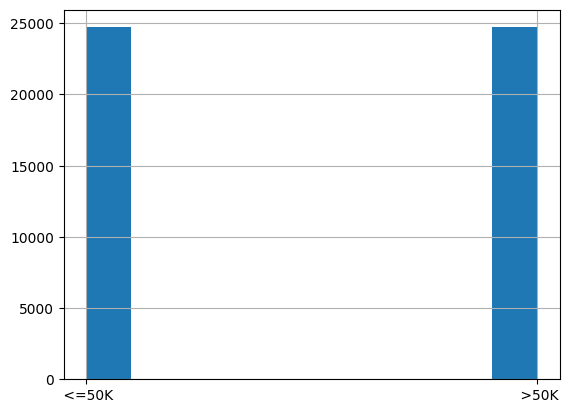

In [151]:
# Over-sampling using SMOTE

# We have a mixture of types (numerical and categorical) so we must use SMOTENC

# Over-sample by creating a SMOTENC instance set to use the pd.DataFrame dtypes for determining the categorical types and 
# invoce the fit_resample method. To avoid having to put the dataset back together, we send the entire dataset as X
dataset_census_income_oversampled, _ = SMOTENC('auto').fit_resample(dataset_census_income, dataset_census_income['income'])

dataset_census_income_oversampled['income'].hist()


### Encoding Categorical Features


In [152]:
# Pandas can be used to create dummy encoding. We remove the target to avoid encoding it 
features_census_income_dummy = pd.get_dummies(dataset_census_income.drop('income', axis=1))
features_census_income_dummy.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Unknown,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknown
0,39,77516,13,2174,0,40,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,

In [153]:
features_census_income_dummy.shape

(32561, 108)

In [154]:
# Sklearn can one-hot encode
onehot =  OneHotEncoder()
categorical_features_census_income = dataset_census_income[categorical_features]
features_census_income_onehot = onehot.fit_transform(categorical_features_census_income.drop('income', axis=1))
features_census_income_onehot


<32561x102 sparse matrix of type '<class 'numpy.float64'>'
	with 260488 stored elements in Compressed Sparse Row format>